Principal Component Analysis(PCA) is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

# Introducing Principal Component Analysis

PCA is a fast and flexible unsupervised method for dimensionality reduction in data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

(200, 2)


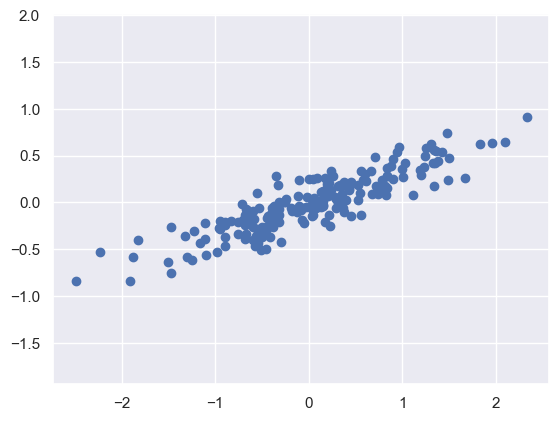

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
print(X.shape)

Rather than attempting to predict the y values from the x values, the unsupervised learning problem attenpts to learn about the relationship between the x and y values.

In PCA, one quantifies this relationship by finding a list of the principle axes in the data, and using those axes to describe the dataset.

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

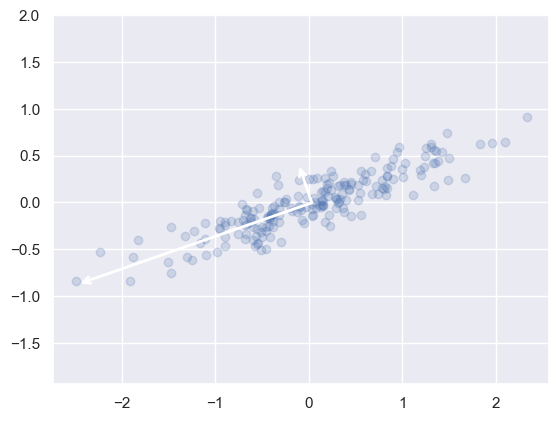

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0,shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)
    
# plot data
plt.scatter(X[:,0],X[:,1],alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_ + v)
plt.axis('equal')

The length of the vector is an idication of how "important" that axis is in discribing the distribution of the data.

# PCA as dimensionality reduction

Zero out one or more of the smallest principal components.

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ",X.shape)
print("transformed shape:",X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.0060642308539953)

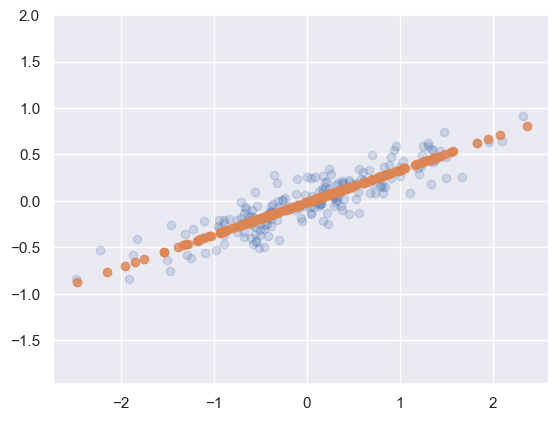

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8)
plt.axis('equal')

# PCA for visualization: Handwritten digits

The usefulness of dimensionality reduction becomes much more clear when we look at high-dimensional data.

In [9]:
# load the data
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The data consists of 8 * 8 pixel images, meaning that they are 64-dimensional.

In [10]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


print the first two principal components of each point to learn about the data

/var/folders/7k/578pqnvd7t9_87g17msvh4100000gn/T/ipykernel_3253/2000080549.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('autumn',10))


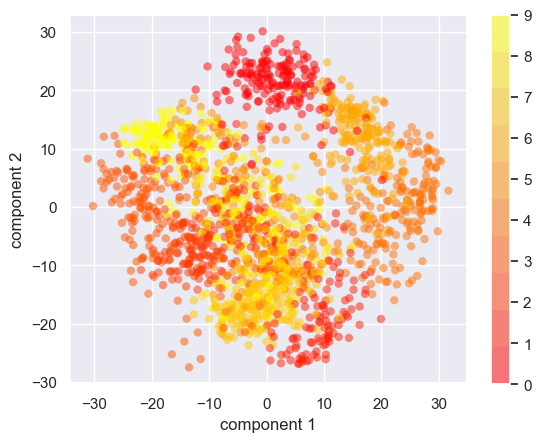

In [11]:
plt.scatter(projected[:,0],projected[:,1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('autumn',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

# Choosing the number of components

Text(0, 0.5, 'cumulative explained variance')

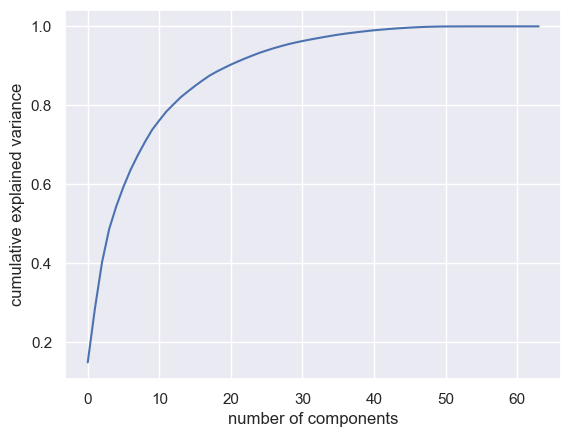

In [12]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

The first 10 components contain approximately 75% of the variance.

# PCA as noise Filtering

PCA can also be used as a filtering approach for noisy data.

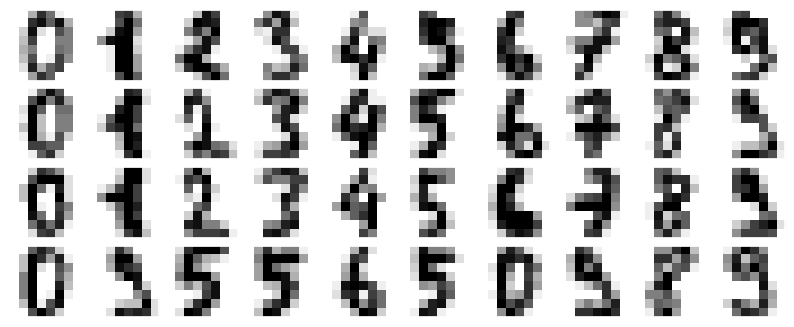

In [13]:
# plot several of the input noise-free data
def plot_digits(data):
    fig,axes = plt.subplots(4,10,figsize=(10,4),
                           subplot_kw={'xticks':[],'yticks':[]},
                           gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary',interpolation='nearest',
                 clim=(0,16))
plot_digits(digits.data)

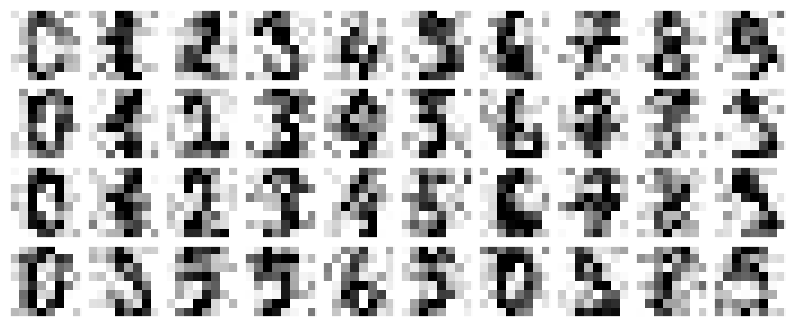

In [14]:
# add some random noise to create a noisy dataset, and replot it
np.random.seed(42)
noisy = np.random.normal(digits.data,4)
plot_digits(noisy)

In [15]:
# train a PCA on the noisy data, requesting that the projection preserve 50% of the variance
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amount to 12 principal components.

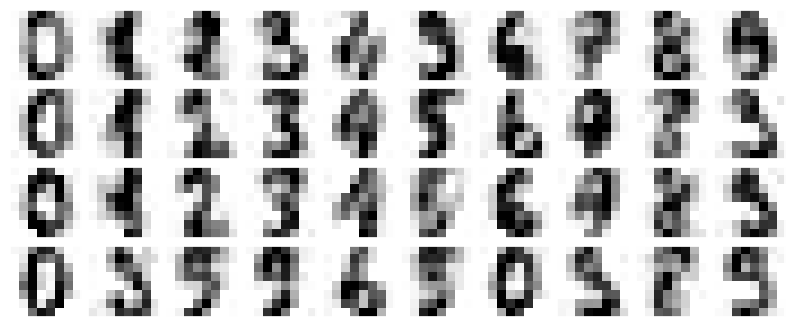

In [16]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Digits "denoised" using PCA.